# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I wouldn't recommend Britis...
1,✅ Trip Verified | Absolutely horrible experie...
2,Not Verified | This is the worst airline. Not...
3,✅ Trip Verified | I will never fly British Ai...
4,✅ Trip Verified | Worst aircraft I have ever ...


In [4]:
df

,reviews
0,✅ Trip Verified | I wouldn't recommend Britis...
1,✅ Trip Verified | Absolutely horrible experie...
2,Not Verified | This is the worst airline. Not...
3,✅ Trip Verified | I will never fly British Ai...
4,✅ Trip Verified | Worst aircraft I have ever ...
...,...
995,✅ Trip Verified | Calgary to London. Cabin fu...
996,✅ Trip Verified | London to Zurich. The airli...
997,✅ Trip Verified | Glasgow to New York JFK via...
998,✅ Trip Verified | Flew on a last minute emerg...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

### remove | before each column

In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [6]:
df

,reviews
0,I wouldn't recommend British Airways at all....
1,Absolutely horrible experience. I booked a t...
2,This is the worst airline. Not one thing wen...
3,I will never fly British Airways again. To s...
4,Worst aircraft I have ever flown. The seats ...
...,...
995,Calgary to London. Cabin full. Overhead lock...
996,London to Zurich. The airline isn’t bad. The...
997,Glasgow to New York JFK via London. Outgoing...
998,Flew on a last minute emergency trip London ...


### Step 1 clean the text

In [7]:
import re

# Step1: clean the text
def clean(text):
# Remove all special characters and numericals and remain alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Clean the text in the review column
df['After cleaned reviews'] = df['reviews'].apply(clean)

# show top five column
df.head()

,reviews,After cleaned reviews
0,I wouldn't recommend British Airways at all....,I wouldn t recommend British Airways at all I...
1,Absolutely horrible experience. I booked a t...,Absolutely horrible experience I booked a tic...
2,This is the worst airline. Not one thing wen...,This is the worst airline Not one thing went ...
3,I will never fly British Airways again. To s...,I will never fly British Airways again To sta...
4,Worst aircraft I have ever flown. The seats ...,Worst aircraft I have ever flown The seats we...


### use ruled-based sentiment analysis (https://www.analyticsvidhya.com/blog/2021/06/rule-based-sentiment-analysis-in-python/) 

#### Step 2 Tokenization

In [8]:
# reference: https://www.nltk.org/
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /Users/zhijiewei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhijiewei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhijiewei/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Step 3  Enrichment – POS tagging and Step 4 Stopwords removal

In [9]:

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['After cleaned reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/zhijiewei/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/zhijiewei/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,After cleaned reviews,POS tagged
0,I wouldn't recommend British Airways at all....,I wouldn t recommend British Airways at all I...,"[(recommend, v), (British, a), (Airways, n), (..."
1,Absolutely horrible experience. I booked a t...,Absolutely horrible experience I booked a tic...,"[(Absolutely, r), (horrible, a), (experience, ..."
2,This is the worst airline. Not one thing wen...,This is the worst airline Not one thing went ...,"[(worst, a), (airline, n), (one, None), (thing..."
3,I will never fly British Airways again. To s...,I will never fly British Airways again To sta...,"[(never, r), (fly, v), (British, n), (Airways,..."
4,Worst aircraft I have ever flown. The seats ...,Worst aircraft I have ever flown The seats we...,"[(Worst, n), (aircraft, n), (ever, r), (flown,..."


#### Step 5 Obtaining the stem words

In [10]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# ref: https://www.techtarget.com/searchenterpriseai/definition/lemmatization
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,After cleaned reviews,POS tagged,Lemma
0,I wouldn't recommend British Airways at all....,I wouldn t recommend British Airways at all I...,"[(recommend, v), (British, a), (Airways, n), (...",recommend British Airways try call customer ...
1,Absolutely horrible experience. I booked a t...,Absolutely horrible experience I booked a tic...,"[(Absolutely, r), (horrible, a), (experience, ...",Absolutely horrible experience book ticket E...
2,This is the worst airline. Not one thing wen...,This is the worst airline Not one thing went ...,"[(worst, a), (airline, n), (one, None), (thing...",bad airline one thing go right understand ge...
3,I will never fly British Airways again. To s...,I will never fly British Airways again To sta...,"[(never, r), (fly, v), (British, n), (Airways,...",never fly British Airways start plane hour l...
4,Worst aircraft I have ever flown. The seats ...,Worst aircraft I have ever flown The seats we...,"[(Worst, n), (aircraft, n), (ever, r), (flown,...",Worst aircraft ever fly seat cramp uncomfort...


In [11]:
# extract first and last columns
df[['reviews','Lemma']]

,reviews,Lemma
0,I wouldn't recommend British Airways at all....,recommend British Airways try call customer ...
1,Absolutely horrible experience. I booked a t...,Absolutely horrible experience book ticket E...
2,This is the worst airline. Not one thing wen...,bad airline one thing go right understand ge...
3,I will never fly British Airways again. To s...,never fly British Airways start plane hour l...
4,Worst aircraft I have ever flown. The seats ...,Worst aircraft ever fly seat cramp uncomfort...
...,...,...
995,Calgary to London. Cabin full. Overhead lock...,Calgary London Cabin full Overhead locker fu...
996,London to Zurich. The airline isn’t bad. The...,London Zurich airline bad boarding procedure...
997,Glasgow to New York JFK via London. Outgoing...,Glasgow New York JFK via London Outgoing fli...
998,Flew on a last minute emergency trip London ...,Flew last minute emergency trip London Heath...


##### Install VADER to tell if the statement is positive or negative along with the intensity of emotion

In [12]:
!pip install vaderSentiment

In [13]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Here to calculate vader sentiment score
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# here to analyse whether negative or positive
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive reviews'
    elif compound < 0 :
        return 'Negative reviews'
    else:
        return 'Neutral reviews'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
# show top five columns
df.head()

,reviews,After cleaned reviews,POS tagged,Lemma,Sentiment,Analysis
0,I wouldn't recommend British Airways at all....,I wouldn t recommend British Airways at all I...,"[(recommend, v), (British, a), (Airways, n), (...",recommend British Airways try call customer ...,0.2023,Neutral reviews
1,Absolutely horrible experience. I booked a t...,Absolutely horrible experience I booked a tic...,"[(Absolutely, r), (horrible, a), (experience, ...",Absolutely horrible experience book ticket E...,-0.9500,Negative reviews
2,This is the worst airline. Not one thing wen...,This is the worst airline Not one thing went ...,"[(worst, a), (airline, n), (one, None), (thing...",bad airline one thing go right understand ge...,-0.8957,Negative reviews
3,I will never fly British Airways again. To s...,I will never fly British Airways again To sta...,"[(never, r), (fly, v), (British, n), (Airways,...",never fly British Airways start plane hour l...,-0.5222,Negative reviews
4,Worst aircraft I have ever flown. The seats ...,Worst aircraft I have ever flown The seats we...,"[(Worst, n), (aircraft, n), (ever, r), (flown,...",Worst aircraft ever fly seat cramp uncomfort...,-0.7717,Negative reviews


### Count the positive and nagetive reviews 

In [14]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive reviews    524
Negative reviews    370
Neutral reviews     106
Name: Analysis, dtype: int64

### Visualization with piechart

([<matplotlib.patches.Wedge at 0x7feecfd657f0>,
 [Text(-0.08285944828829274, 1.096874793141569, 'Positive reviews'),
  Text(-0.28024785561609883, -1.0637016214251902, 'Negative reviews'),
  Text(1.2758351325693755, -0.44129889474332934, 'Neutral reviews')],
 [Text(-0.045196062702705125, 0.598295341713583, '52.4%'),
  Text(-0.15286246669969025, -0.58020088441374, '37.0%'),
  Text(0.8033036019881252, -0.2778548596532074, '10.6%')])

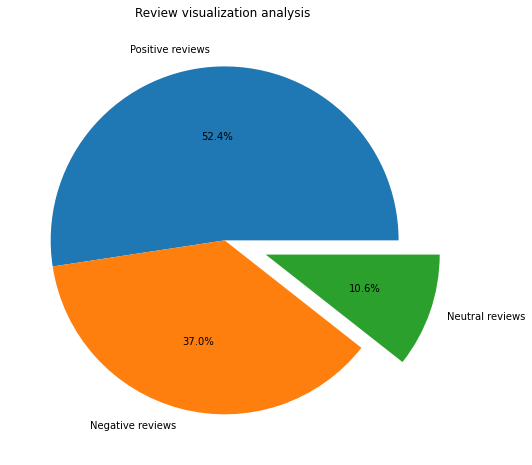

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))

plt.title("Review visualization analysis ")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

### Install wordcloud to visualize keywords

In [16]:
!pip install wordcloud

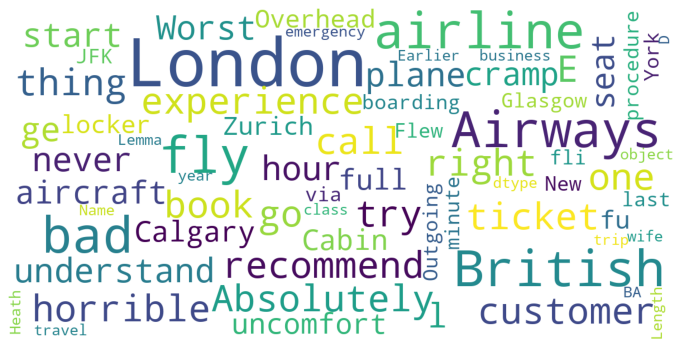

In [17]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=120,
        max_font_size=40,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)